<a href="https://colab.research.google.com/github/dkanh6/Computational_Neuroscience/blob/main/E1_Single_Compartment_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E1 Single Compartment Cell in NEURON


---


This is an example created purely to familarize myself with the NEURON package and experiment with its many features. First I will install NEURON and some other useful libraries such as numpy and matlplotlib

The NEURON module has additional submodules besides .h submodule.

1. .rxd (reaction diffusion dynamics)
2. .gui2 (Jupyter-compatible PlotShape graphs)
3. .gui (Interviews-based GUI tools.)

the .h submodule allows for loading files, executing code, and calling functions written in HOC, an older scriptiong language supported by NEURON.



In [2]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 59.9 MB/s eta 0:00:00


In [3]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
h.load_file('stdrun.hoc') # compiles some of the files for use in the simulation


1.0

## How to Make a Simple Cell


---



A **Section** is the basic morphological building block in NEURON. Think of it as an unbranched cable, (it can be used to represent a soma). Thus the simpliest of neuron models would be only a soma.



In [4]:
soma = h.Section(name='soma')

There is no graphic output so (if desired) one could test that the section was successfully created?

1. **h.toplogy() function** that will dipslay the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.

#OR

2. **psection method** which returns the **p**roperties of the **section** in the form of a python dictionary, giving information such as Length, diamter, axial resistivity, speicifc membrane capacitance. To get values such as length you can either use soma.L or soma.psection()['morphology']['L'].

#OR

3. Print resules to console directly and verify

In [5]:
soma.psection()
soma.psection()['morphology']['L']




100.0

In [6]:
print("The default Length is " + str(soma.L) + " um")
print("The default Diameter is " + str(soma.diam) + "um")
print("The default capacitance is {} uF/ cm^2".format(str(soma.cm)))
print("The default cytoplasmic resistivity is {} ohm-cm".format(str(soma.Ra)))

soma.nseg = 4    #defines how many segments to divide up the section into
soma.diam = 20   # Default of 500 is a carry over from the HH experiments on Giant Squid axons
soma.L = 20      # Default of 100 is a carry over from the HH experiments on Giant Squid axons

The default Length is 100.0 um
The default Diameter is 500.0um
The default capacitance is 1.0 uF/ cm^2
The default cytoplasmic resistivity is 35.4 ohm-cm


To probe objects of a class a little further we can use the dir() function, whcih will provide us all the methods and data members associated with teh oibject. Any method with two leading an trailing underscores are reserved by pyhtonwill provide us with all objects. To get a little help use the help function (for instance help(soma.connect). To do so with all the functions, variables, etc in the NEURON .h submodule use:

In [7]:
#import textwrap
#print(textwrap.fill(', '.join(dir(h))))

# Adding Passive Channels


---


This can be done manually or might be apart of other packages (such as the hodgkin huxley channels, which include a passive channel natively). If only the passive channels are present then the resting membrane potential will be the reverse potntial of the Leak channels



In [8]:
soma.insert('pas')       #This inserts a passive channel
print("Default E_leak = {} mV".format(str(soma.e_pas)))
print("Default g_leak = {} S/cm^s".format(str(soma.g_pas)))

Default E_leak = -70.0 mV
Default g_leak = 0.001 S/cm^s


# Adding Active Channels


---



This example will be inserting the Hodgkin-huxley channels to the soma, who have their values based off the squid giant axon experimental values. We will need to turn off the hh passive channel though, as we already modeled ours earlier

In [9]:
soma.insert('hh')       #Inserts the Hodgkin-Huxley Channels
print("Default El_hh = {} mV".format(str(soma.el_hh)))
print("Default gl_hh = {} S/cm^s".format(str(soma.gl_hh)))
print("Default Ek_hh = {} mV".format(str(soma.ek)))
print("Default gkbar_hh = {} S/cm^s".format(str(soma.gkbar_hh)))
print("Default Ena_hh = {} mV".format(str(soma.ena)))
print("Default gna_hh = {} S/cm^s".format(str(soma.gnabar_hh)))
soma.gl_hh = 0 # This sets the flux of the leak channels to zero, effectively turning them off

Default El_hh = -54.3 mV
Default gl_hh = 0.0003 S/cm^s
Default Ek_hh = -77.0 mV
Default gkbar_hh = 0.036 S/cm^s
Default Ena_hh = 50.0 mV
Default gna_hh = 0.12 S/cm^s


# Current Clamp


---



A current clamp will inject a constant current into the soma and is typically used to measure the change in voltage. To set up a current clamp we need to establish 4 parameters (the location (on a scale of 0 -1)), the duration (how long the current is injected for), the amplitude (how much current), and the delay (how long it waits before injecting the current).

In [10]:
ic = h.IClamp(soma(0.5)) # 0.5 means that at the middle of the soma a current injection will occur, if soma(0) that would be left side and if soma(1) that would be right side
ic.dur = 2.5 #ms
ic.amp = 1 #nA
ic.delay = 100 #ms



# Running the Simulation


---


Now that the cell is complete, we need to run the simulation, which is going to measure the voltage change due to our current clamp. First we will need to determine how long the simulation should last, how long each time step will be, and set up the vectors to capture the data at each time step.

In [11]:
h.v_init = soma.e_pas   # This sets the initial voltage of the cell to the leak reversal potential
h.tstop = tstop = 200 # how long the simulation should run in (ms)
h.dt = 0.025 # time step (resolution) of the simulation in (ms)

#Initalize the vectors that will record the time & voltage
t_vec = h.Vector()
soma_v_vec = h.Vector()

# Record the voltage (_ref_v) and time (_ref_t) and voltage (_ref_v) into the vectors we just created
t_vec.record(h._ref_t)
soma_v_vec.record(soma(0.5)._ref_v)
h.run()  # This command begins the simuation

0.0

# Plotting the Results
The simulation has been run, but we need to display the results in the vector variables in a way that easy to interperet




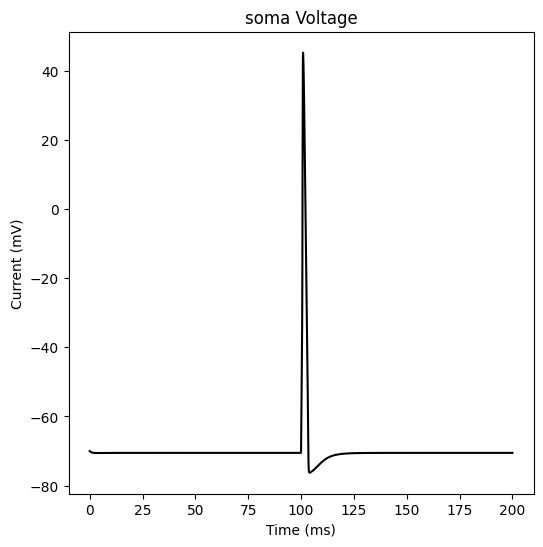

In [12]:
fig, axs = plt.subplots(1,1,figsize=(6, 6))
axs.plot(t_vec,soma_v_vec, color = 'black') # plots t vs V
axs.set_title(str(soma) + " Voltage")
axs.set_xlabel("Time (ms)")
axs.set_ylabel("Current (mV)")
plt.show()